In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def nagruzka(name_list,k,cosa,m):
    Unom = 10
    res_list = []
    with open(name_list, 'r', encoding='utf-8') as f:
        with sqlite3.connect("server_db.db") as my_data:
            sql = my_data.cursor()
            for i in f.readlines():
                if i.strip().split()[1] == '0':
                    res_list.append(0)
                elif len(i.strip().split()[1:]) == 1 and i.strip().split()[1].endswith('n') == False:
                    sql.execute(f"SELECT s FROM trans2 WHERE mark_trans = '{i.strip().split()[1]}'")
                    res_list.append(float(sql.fetchone()[0]))
                elif len(i.strip().split()[1:]) == 1 and i.strip().split()[1].endswith('n') == True:
                    sql.execute(f"SELECT pxx,qxx FROM trans2 WHERE mark_trans = '{i.strip().split()[1][:-1]}'")
                    pxx, qxx = map(float, sql.fetchone())
                    res_list.append(complex(pxx, qxx))
                else:
                    my_list = (i.strip().split()[1:])
                    my_list.remove("+")
                    result = 0
                    for i in my_list:
                        sql.execute(f"SELECT pxx,qxx FROM trans2 WHERE mark_trans = '{i}'")
                        pxx, qxx = map(float, sql.fetchone())
                        result += complex(pxx, qxx)
                    res_list.append(result)

    res_list.remove(0)
    
    Icp_max = (sum(res_list)*k)/(Unom*pow(3,0.5))
    Iнб = [(Icp_max*i)/sum(res_list) for i in res_list]
    Pнб = [i*cosa*Unom*pow(3,0.5) for i in Iнб]
    Qнб = [i*(1-cosa**2)**0.5*Unom*pow(3,0.5) for i in Iнб]
    Sнб = np.rot90(np.array([[complex(Pнб[i],Qнб[i]) for i in range(len(Pнб))]]),k=-1)
    Sнм = Sнб * m
    
    
    
    
    
    
    return -Sнб,-Sнм


def main():
    name_nagruzka = 'нагрузки.txt'
    print(nagruzka(name_list=name_nagruzka,k=0.65,cosa = 0.91,m = 0.2))


if __name__ == "__main__":
    main()


(array([[  -0.     -0.j        ],
       [  -0.     -0.j        ],
       [-147.875 -67.37384044j],
       [  -0.     -0.j        ],
       [ -14.7875 -6.73738404j],
       [  -0.     -0.j        ],
       [  -0.     -0.j        ],
       [  -0.     -0.j        ],
       [ -59.15  -26.94953617j],
       [  -0.     -0.j        ],
       [-147.875 -67.37384044j],
       [  -0.     -0.j        ],
       [ -37.2645-16.97820779j],
       [  -0.     -0.j        ],
       [ -14.7875 -6.73738404j],
       [  -0.     -0.j        ],
       [-147.875 -67.37384044j],
       [  -0.     -0.j        ],
       [  -0.     -0.j        ],
       [ -59.15  -26.94953617j],
       [ -23.66  -10.77981447j],
       [  -0.     -0.j        ],
       [ -37.2645-16.97820779j],
       [  -0.     -0.j        ],
       [-147.875 -67.37384044j],
       [  -0.     -0.j        ],
       [  -0.     -0.j        ],
       [ -59.15  -26.94953617j],
       [  -0.     -0.j        ],
       [ -37.2645-16.97820779j],
       [ 

Функция возвращает нагрузки(наибольшие и наименьшие) в виде матриц

In [2]:
name_nagruzka = 'нагрузки.txt'
Sнб,Sнм = nagruzka(name_list=name_nagruzka,k=0.65,cosa = 0.91,m = 0.2)
Unom = 10

In [3]:
Sнб

array([[  -0.     -0.j        ],
       [  -0.     -0.j        ],
       [-147.875 -67.37384044j],
       [  -0.     -0.j        ],
       [ -14.7875 -6.73738404j],
       [  -0.     -0.j        ],
       [  -0.     -0.j        ],
       [  -0.     -0.j        ],
       [ -59.15  -26.94953617j],
       [  -0.     -0.j        ],
       [-147.875 -67.37384044j],
       [  -0.     -0.j        ],
       [ -37.2645-16.97820779j],
       [  -0.     -0.j        ],
       [ -14.7875 -6.73738404j],
       [  -0.     -0.j        ],
       [-147.875 -67.37384044j],
       [  -0.     -0.j        ],
       [  -0.     -0.j        ],
       [ -59.15  -26.94953617j],
       [ -23.66  -10.77981447j],
       [  -0.     -0.j        ],
       [ -37.2645-16.97820779j],
       [  -0.     -0.j        ],
       [-147.875 -67.37384044j],
       [  -0.     -0.j        ],
       [  -0.     -0.j        ],
       [ -59.15  -26.94953617j],
       [  -0.     -0.j        ],
       [ -37.2645-16.97820779j],
       [  

In [4]:
Sнм

array([[ -0.     -0.j        ],
       [ -0.     -0.j        ],
       [-29.575 -13.47476809j],
       [ -0.     -0.j        ],
       [ -2.9575 -1.34747681j],
       [ -0.     -0.j        ],
       [ -0.     -0.j        ],
       [ -0.     -0.j        ],
       [-11.83   -5.38990723j],
       [ -0.     -0.j        ],
       [-29.575 -13.47476809j],
       [ -0.     -0.j        ],
       [ -7.4529 -3.39564156j],
       [ -0.     -0.j        ],
       [ -2.9575 -1.34747681j],
       [ -0.     -0.j        ],
       [-29.575 -13.47476809j],
       [ -0.     -0.j        ],
       [ -0.     -0.j        ],
       [-11.83   -5.38990723j],
       [ -4.732  -2.15596289j],
       [ -0.     -0.j        ],
       [ -7.4529 -3.39564156j],
       [ -0.     -0.j        ],
       [-29.575 -13.47476809j],
       [ -0.     -0.j        ],
       [ -0.     -0.j        ],
       [-11.83   -5.38990723j],
       [ -0.     -0.j        ],
       [ -7.4529 -3.39564156j],
       [ -0.     -0.j        ],
       [

Создаем матрицу С (матрицу коэффициентов токораспределения)

In [5]:
def first_matrix(model):
    start, end = [int(i.split('-')[0]) for i in model], [int(i.split('-')[1]) for i in model]
    M = np.zeros(shape=[max(end), max(start)])
    try:
        for i in range(len(start)):
            M[start[i]-1,i] = 1
            M[end[i]-1, i] = -1

        M = M[1:, :].astype(np.int32)

        return np.linalg.inv(M)
    except Exception as ex:

        return "Something_wrong"

def main():
    model =  "1-2 2-3 3-4 2-5 5-6 5-7 "\
        "7-8 8-9 9-10 8-11 11-12 7-13 13-14 7-15 "\
        "15-16 15-17 17-18 15-19 19-20 20-21 19-22 19-23 23-24 "\
        "23-25 25-26 25-27 27-28 28-29 27-30 30-31 "\
        "23-32 32-33 33-34 32-35 35-36 35-37 37-38".split()
    print(first_matrix(model))

if __name__ == '__main__':
    main()

[[-1. -1. -1. ... -1. -1. -1.]
 [-0. -1. -1. ... -0. -0. -0.]
 [-0. -0. -1. ... -0. -0. -0.]
 ...
 [-0. -0. -0. ... -1. -0. -0.]
 [-0. -0. -0. ... -0. -1. -1.]
 [-0. -0. -0. ... -0. -0. -1.]]


Нумерация ветвей

In [6]:
model =  "1-2 2-3 3-4 2-5 5-6 5-7 "\
        "7-8 8-9 9-10 8-11 11-12 7-13 13-14 7-15 "\
        "15-16 15-17 17-18 15-19 19-20 20-21 19-22 19-23 23-24 "\
        "23-25 25-26 25-27 27-28 28-29 27-30 30-31 "\
        "23-32 32-33 33-34 32-35 35-36 35-37 37-38".split()
model

['1-2',
 '2-3',
 '3-4',
 '2-5',
 '5-6',
 '5-7',
 '7-8',
 '8-9',
 '9-10',
 '8-11',
 '11-12',
 '7-13',
 '13-14',
 '7-15',
 '15-16',
 '15-17',
 '17-18',
 '15-19',
 '19-20',
 '20-21',
 '19-22',
 '19-23',
 '23-24',
 '23-25',
 '25-26',
 '25-27',
 '27-28',
 '28-29',
 '27-30',
 '30-31',
 '23-32',
 '32-33',
 '33-34',
 '32-35',
 '35-36',
 '35-37',
 '37-38']

In [7]:
C = first_matrix(model=model)
C

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-0., -1., -1., ..., -0., -0., -0.],
       [-0., -0., -1., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., -1., -0., -0.],
       [-0., -0., -0., ..., -0., -1., -1.],
       [-0., -0., -0., ..., -0., -0., -1.]])

Найдем потоки, которые протекают по нашим ветвям в режимах наибольших и меньших нагрузок

In [8]:
Svнб =  C.dot(Sнб)
Svнб.real

array([[1111.4285],
       [ 147.875 ],
       [ 147.875 ],
       [ 963.5535],
       [  14.7875],
       [ 948.766 ],
       [ 207.025 ],
       [  59.15  ],
       [  59.15  ],
       [ 147.875 ],
       [ 147.875 ],
       [  37.2645],
       [  37.2645],
       [ 704.4765],
       [  14.7875],
       [ 147.875 ],
       [ 147.875 ],
       [ 541.814 ],
       [  59.15  ],
       [  59.15  ],
       [  23.66  ],
       [ 459.004 ],
       [  37.2645],
       [ 244.2895],
       [ 147.875 ],
       [  96.4145],
       [  59.15  ],
       [  59.15  ],
       [  37.2645],
       [  37.2645],
       [ 177.45  ],
       [ 147.875 ],
       [ 147.875 ],
       [  29.575 ],
       [  14.7875],
       [  14.7875],
       [  14.7875]])

In [9]:
Svнм =  C.dot(Sнм)
Svнм

array([[222.2857+101.27635694j],
       [ 29.575  +13.47476809j],
       [ 29.575  +13.47476809j],
       [192.7107 +87.80158886j],
       [  2.9575  +1.34747681j],
       [189.7532 +86.45411205j],
       [ 41.405  +18.86467532j],
       [ 11.83    +5.38990723j],
       [ 11.83    +5.38990723j],
       [ 29.575  +13.47476809j],
       [ 29.575  +13.47476809j],
       [  7.4529  +3.39564156j],
       [  7.4529  +3.39564156j],
       [140.8953 +64.19379517j],
       [  2.9575  +1.34747681j],
       [ 29.575  +13.47476809j],
       [ 29.575  +13.47476809j],
       [108.3628 +49.37155027j],
       [ 11.83    +5.38990723j],
       [ 11.83    +5.38990723j],
       [  4.732   +2.15596289j],
       [ 91.8008 +41.82568014j],
       [  7.4529  +3.39564156j],
       [ 48.8579 +22.26031688j],
       [ 29.575  +13.47476809j],
       [ 19.2829  +8.78554879j],
       [ 11.83    +5.38990723j],
       [ 11.83    +5.38990723j],
       [  7.4529  +3.39564156j],
       [  7.4529  +3.39564156j],
       [ 3

In [10]:
df = pd.DataFrame({'vetki':model,
                   'P_нб':np.squeeze(np.asarray(Svнб)).real,
                   'Q_нб':np.squeeze(np.asarray(Svнб)).imag,
                   'P_нм':np.squeeze(np.asarray(Svнм)).real,
                   'Q_нм':np.squeeze(np.asarray(Svнм)).imag,
                   'Iветви_нб':abs(np.squeeze(np.asarray(Svнб))/(Unom * pow(3,0.5))),
                   'Iветви_нм':abs(np.squeeze(np.asarray(Svнм))/(Unom * pow(3,0.5)))})
df

,vetki,P_нб,Q_нб,P_нм,Q_нм,Iветви_нб,Iветви_нм
0,1-2,1111.4285,506.381785,222.2857,101.276357,70.514675,14.102935
1,2-3,147.8750,67.373840,29.5750,13.474768,9.381942,1.876388
2,3-4,147.8750,67.373840,29.5750,13.474768,9.381942,1.876388
3,2-5,963.5535,439.007944,192.7107,87.801589,61.132733,12.226547
4,5-6,14.7875,6.737384,2.9575,1.347477,0.938194,0.187639
5,5-7,948.7660,432.270560,189.7532,86.454112,60.194539,12.038908
6,7-8,207.0250,94.323377,41.4050,18.864675,13.134719,2.626944
7,8-9,59.1500,26.949536,11.8300,5.389907,3.752777,0.750555
8,9-10,59.1500,26.949536,11.8300,5.389907,3.752777,0.750555
9,8-11,147.8750,67.373840,29.5750,13.474768,9.381942,1.876388


In [11]:
df.to_excel("таблица_потоков.xlsx")

In [12]:
import sqlite3
import numpy as np


def vetvi():
    R = []
    X = []
    with open("линии.txt", 'r', encoding="utf-8") as f:
        with sqlite3.connect("server_db.db") as my_data:
            sql = my_data.cursor()
            for i in f.readlines():
                sql.execute(f"SELECT r0,x0 FROM provod WHERE mark_provod = '{i.strip().split()[1]}'")
                if sql.fetchone() is None:
                    sql.execute(f"SELECT rt,xt FROM trans2 WHERE mark_trans = '{i.strip().split()[1]}'")
                    r, x = map(float, sql.fetchone())
                    R.append(r)
                    X.append(x)
                else:
                    sql.execute(f"SELECT r0,x0 FROM provod WHERE mark_provod = '{i.strip().split()[1]}'")
                    r, x = map(float, sql.fetchone())
                    length = float(i.strip().split()[2])
                    R.append(r * length)
                    X.append(x * length)

    Z = np.zeros(shape=(len(R), len(X))).astype(complex)
    np.fill_diagonal(Z, [complex(R[i], X[i]) for i in range(len(X))])

    return Z


def main():
    print(vetvi())


if __name__ == "__main__":
    main()


[[  1.05963  +0.85215j   0.       +0.j        0.       +0.j      ...
    0.       +0.j        0.       +0.j        0.       +0.j     ]
 [  0.       +0.j        0.4505   +0.19398j   0.       +0.j      ...
    0.       +0.j        0.       +0.j        0.       +0.j     ]
 [  0.       +0.j        0.       +0.j        6.53    +18.74j    ...
    0.       +0.j        0.       +0.j        0.       +0.j     ]
 ...
 [  0.       +0.j        0.       +0.j        0.       +0.j      ...
  121.72   +167.77j      0.       +0.j        0.       +0.j     ]
 [  0.       +0.j        0.       +0.j        0.       +0.j      ...
    0.       +0.j        0.731    +0.31476j   0.       +0.j     ]
 [  0.       +0.j        0.       +0.j        0.       +0.j      ...
    0.       +0.j        0.       +0.j      121.72   +167.77j   ]]


In [13]:
Z = vetvi()
Z.diagonal().imag

array([8.52150e-01, 1.93980e-01, 1.87400e+01, 1.58700e-01, 1.67770e+02,
       5.14050e-01, 3.75882e-01, 7.35660e-02, 5.45600e+01, 4.75800e-01,
       1.87400e+01, 3.21714e-01, 7.02700e+01, 4.79550e-01, 1.67770e+02,
       2.78160e-01, 1.87400e+01, 1.07210e-01, 3.33060e-01, 5.45600e+01,
       1.09700e+02, 3.86950e-01, 7.02700e+01, 2.91100e-01, 1.87400e+01,
       3.76980e-01, 1.48230e-01, 5.45600e+01, 4.04796e-01, 7.02700e+01,
       1.39080e-01, 4.75800e-01, 1.87400e+01, 3.16590e-01, 1.67770e+02,
       3.14760e-01, 1.67770e+02])

In [14]:
sopr = pd.DataFrame({'vetki':model,
                    "R":Z.diagonal().real,
                    "X":Z.diagonal().imag})
sopr

,vetki,R,X
0,1-2,1.059630,0.852150
1,2-3,0.450500,0.193980
2,3-4,6.530000,18.740000
3,2-5,0.197340,0.158700
4,5-6,121.720000,167.770000
5,5-7,0.639210,0.514050
6,7-8,0.811330,0.375882
7,8-9,0.170850,0.073566
8,9-10,26.460000,54.560000
9,8-11,1.105000,0.475800


Объеденяем таблицы

In [15]:
sopr.to_excel("Soprotiv.xlsx")
full_table = df.merge(sopr,on = 'vetki')
full_table

,vetki,P_нб,Q_нб,P_нм,Q_нм,Iветви_нб,Iветви_нм,R,X
0,1-2,1111.4285,506.381785,222.2857,101.276357,70.514675,14.102935,1.059630,0.852150
1,2-3,147.8750,67.373840,29.5750,13.474768,9.381942,1.876388,0.450500,0.193980
2,3-4,147.8750,67.373840,29.5750,13.474768,9.381942,1.876388,6.530000,18.740000
3,2-5,963.5535,439.007944,192.7107,87.801589,61.132733,12.226547,0.197340,0.158700
4,5-6,14.7875,6.737384,2.9575,1.347477,0.938194,0.187639,121.720000,167.770000
5,5-7,948.7660,432.270560,189.7532,86.454112,60.194539,12.038908,0.639210,0.514050
6,7-8,207.0250,94.323377,41.4050,18.864675,13.134719,2.626944,0.811330,0.375882
7,8-9,59.1500,26.949536,11.8300,5.389907,3.752777,0.750555,0.170850,0.073566
8,9-10,59.1500,26.949536,11.8300,5.389907,3.752777,0.750555,26.460000,54.560000
9,8-11,147.8750,67.373840,29.5750,13.474768,9.381942,1.876388,1.105000,0.475800


Найдем падения напряжения на участках

In [16]:
full_table["dU_нб"] = (full_table["P_нб"]*full_table["R"] + full_table["Q_нб"]*full_table["X"])/Unom
full_table["dU_нм"] = (full_table["P_нм"]*full_table["R"] + full_table["Q_нм"]*full_table["X"])/Unom
full_table["dU_нб%"] = full_table["dU_нб"] / (Unom*1000)
full_table["dU_нм%"] = full_table["dU_нм"] / (Unom*1000)
full_table = full_table.drop(["R",'X'],axis =1)
full_table

,vetki,P_нб,Q_нб,P_нм,Q_нм,Iветви_нб,Iветви_нм,dU_нб,dU_нм,dU_нб%,dU_нм%
0,1-2,1111.4285,506.381785,222.2857,101.276357,70.514675,14.102935,160.921622,32.184324,0.016092,0.003218
1,2-3,147.8750,67.373840,29.5750,13.474768,9.381942,1.876388,7.968687,1.593737,0.000797,0.000159
2,3-4,147.8750,67.373840,29.5750,13.474768,9.381942,1.876388,222.820952,44.564190,0.022282,0.004456
3,2-5,963.5535,439.007944,192.7107,87.801589,61.132733,12.226547,25.981821,5.196364,0.002598,0.000520
4,5-6,14.7875,6.737384,2.9575,1.347477,0.938194,0.187639,293.026542,58.605308,0.029303,0.005861
5,5-7,948.7660,432.270560,189.7532,86.454112,60.194539,12.038908,82.866940,16.573388,0.008287,0.001657
6,7-8,207.0250,94.323377,41.4050,18.864675,13.134719,2.626944,20.342005,4.068401,0.002034,0.000407
7,8-9,59.1500,26.949536,11.8300,5.389907,3.752777,0.750555,1.208835,0.241767,0.000121,0.000024
8,9-10,59.1500,26.949536,11.8300,5.389907,3.752777,0.750555,303.547569,60.709514,0.030355,0.006071
9,8-11,147.8750,67.373840,29.5750,13.474768,9.381942,1.876388,19.545835,3.909167,0.001955,0.000391


In [17]:
full_table.to_excel("Пункт_5.xlsx")

Найдем падение напряжение в узлах

In [18]:
М  = np.linalg.inv(C)
dUyзлы_нб = np.linalg.inv(М.T).dot(full_table["dU_нб"])
dUyзлы_нм = np.linalg.inv(М.T).dot(full_table["dU_нм"])
dUyзлы_нб

array([-160.92162193, -168.89030844, -391.71126041, -186.90344277,
       -479.92998487, -269.77038241, -290.11238768, -291.32122239,
       -594.86879175, -309.65822251, -532.47917448, -273.10081224,
       -524.91924038, -327.17108782, -620.19762992, -338.59788356,
       -561.41883554, -339.6844078 , -345.15724155, -648.70481092,
       -620.98003253, -377.19511563, -629.01354377, -392.21376728,
       -615.03471926, -402.31084485, -404.74655658, -708.29412594,
       -406.50135156, -658.31977969, -383.64660708, -403.19244191,
       -626.01339388, -386.24770664, -679.27424873, -387.54073879,
       -680.56728088])

In [19]:
dUyзлы_нб.shape

(37,)

Найдем напряжения в узлах в режимах наибольших и наименьших нагрузок

In [20]:

Uy_нб = [10] + dUyзлы_нб/1000 
Uy_нм = [10] + dUyзлы_нм/1000
Uy_нб


array([9.83907838, 9.83110969, 9.60828874, 9.81309656, 9.52007002,
       9.73022962, 9.70988761, 9.70867878, 9.40513121, 9.69034178,
       9.46752083, 9.72689919, 9.47508076, 9.67282891, 9.37980237,
       9.66140212, 9.43858116, 9.66031559, 9.65484276, 9.35129519,
       9.37901997, 9.62280488, 9.37098646, 9.60778623, 9.38496528,
       9.59768916, 9.59525344, 9.29170587, 9.59349865, 9.34168022,
       9.61635339, 9.59680756, 9.37398661, 9.61375229, 9.32072575,
       9.61245926, 9.31943272])

In [21]:
dfUy = pd.DataFrame({'узлы':np.arange(1,38),
                    'Uy_нб':Uy_нб,
                    'Uy_нм':Uy_нм,
                    'Uy_нб%':((10 - Uy_нб)/10)*100,
                    'Uy_нм%':((10 - Uy_нм)/10)*100
                    })

dfUy

,узлы,Uy_нб,Uy_нм,Uy_нб%,Uy_нм%
0,1,9.839078,9.967816,1.609216,0.321843
1,2,9.831110,9.966222,1.688903,0.337781
2,3,9.608289,9.921658,3.917113,0.783423
3,4,9.813097,9.962619,1.869034,0.373807
4,5,9.520070,9.904014,4.799300,0.959860
5,6,9.730230,9.946046,2.697704,0.539541
6,7,9.709888,9.941978,2.901124,0.580225
7,8,9.708679,9.941736,2.913212,0.582642
8,9,9.405131,9.881026,5.948688,1.189738
9,10,9.690342,9.938068,3.096582,0.619316


In [22]:
dfUy.to_excel("Wrong_table.xlsx")

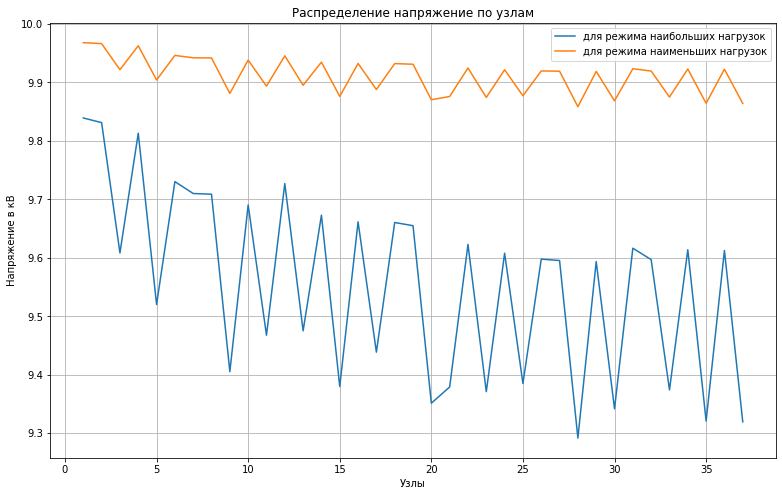

In [23]:
plt.figure(figsize=(13,8))
plt.plot(dfUy['узлы'],dfUy['Uy_нб'],label = "для режима наибольших нагрузок")
plt.plot(dfUy['узлы'],dfUy['Uy_нм'],label = "для режима наименьших нагрузок")
plt.xlabel("Узлы")
plt.ylabel("Напряжение в кВ")
plt.title("Распределение напряжение по узлам")


plt.legend()
plt.grid()

Все конечно хорошо, но это неправильная таблица, в связи с напряжением в узлах

In [24]:
def balanc(m,p,q,r,x):
    uy = np.array([10]+[10]*36)
    while True:
        lats_u = uy.copy()
        du = (p*r+q*x)/uy
        dv = np.linalg.inv(m.T).dot(du)
        uy = [10] + dv/1000
        if all(abs(lats_u - uy)<0.0000001):
            break
        else:
            continue
    
    
    return uy
    


In [25]:
dfUy['Uy_нб']*1000 - balanc(М,full_table['P_нб'],full_table['Q_нб'],sopr['R'],sopr['X'])*1000


0      2.676432
1      2.815650
2     12.194322
3      3.179873
4     18.553077
5      5.525749
6      6.146799
7      6.183865
8     26.287678
9      6.785526
10    19.811100
11     5.621237
12    20.138031
13     7.513384
14    27.817703
15     7.923561
16    21.721786
17     7.964076
18     8.164526
19    30.276165
20    27.469506
21     9.472834
22    27.156779
23    10.102386
24    25.347734
25    10.537193
26    10.642755
27    35.017611
28    10.719642
29    29.314152
30     9.737018
31    10.580680
32    26.125433
33     9.844294
34    32.292418
35     9.897811
36    32.393285
Name: Uy_нб, dtype: float64

Как видно, мы сильно загрубили ресчет,особенно сильно для режима наибольших нагрузок

In [26]:
dfUy['Uy_нм']*1000 - balanc(М,full_table['P_нм'],full_table['Q_нм'],sopr['R'],sopr['X'])*1000

0     0.104255
1     0.109674
2     0.463656
3     0.123817
4     0.695956
5     0.214081
6     0.237923
7     0.239346
8     0.976398
9     0.262388
10    0.745481
11    0.217754
12    0.755990
13    0.290033
14    1.032304
15    0.305685
16    0.815469
17    0.307229
18    0.314873
19    1.119856
20    1.020620
21    0.364533
22    1.011419
23    0.388400
24    0.947726
25    0.404863
26    0.408859
27    1.289275
28    0.411768
29    1.089357
30    0.374559
31    0.406499
32    0.975990
33    0.378629
34    1.192961
35    0.380659
36    1.196571
Name: Uy_нм, dtype: float64

Для режима наименьших нагрузок, перерасчетом можно пренебречь

In [27]:
Uy_нб = balanc(М,full_table['P_нб'],full_table['Q_нб'],sopr['R'],sopr['X'])
Uy_нм = balanc(М,full_table['P_нм'],full_table['Q_нм'],sopr['R'],sopr['X'])

In [28]:
last_table = pd.DataFrame({"number_Uy":np.arange(1,38),
                           'Uy_нб':Uy_нб,
                           'Uy_нм':Uy_нм
                          })

last_table['Uy_нб%'] = (Unom - last_table['Uy_нб']) / Unom *100
last_table['Uy_нм%'] = (Unom - last_table['Uy_нм']) / Unom *100
last_table

,number_Uy,Uy_нб,Uy_нм,Uy_нб%,Uy_нм%
0,1,9.836402,9.967711,1.635981,0.322886
1,2,9.828294,9.966112,1.717060,0.338877
2,3,9.596094,9.921194,4.039056,0.788059
3,4,9.809917,9.962495,1.900833,0.375045
4,5,9.501517,9.903318,4.984831,0.966820
5,6,9.724704,9.945832,2.752961,0.541682
6,7,9.703741,9.941740,2.962592,0.582604
7,8,9.702495,9.941496,2.975051,0.585036
8,9,9.378844,9.880050,6.211565,1.199502
9,10,9.683556,9.937806,3.164437,0.621940


In [29]:
last_table.to_excel("table_5.xlsx")

Необходимо вывести узлы в которых находятся ТП

In [30]:
def number_transformator():
    result =[]
    with open('нагрузки.txt') as f:
            for i in f.readlines():
                if i.split()[1] !='0':
                    result.append(int(i.split()[0])-1)
                else:
                    continue
    return result
                    
                    
number_transformator()

[3, 5, 9, 11, 13, 15, 17, 20, 21, 23, 25, 28, 30, 33, 35, 37]

Нумерация начинается на 1 меньше, так как в бу 10 кВ

In [306]:
table_tp = last_table[last_table['number_Uy'].isin(number_transformator())].copy()
table_tp

,number_Uy,Uy_нб,Uy_нм,Uy_нб%,Uy_нм%
2,3,9.596094,9.921194,4.039056,0.788059
4,5,9.501517,9.903318,4.984831,0.966820
8,9,9.378844,9.880050,6.211565,1.199502
10,11,9.447710,9.892759,5.522903,1.072413
12,13,9.454943,9.894260,5.450573,1.057398
14,15,9.351985,9.874928,6.480153,1.250718
16,17,9.416859,9.886901,5.831406,1.130992
19,20,9.321019,9.869139,6.789810,1.308608
20,21,9.351550,9.874783,6.484495,1.252166
22,23,9.343830,9.873186,6.561703,1.268141


Теперь необходимо выбрать ответветвления для регулирования 

(16,)

Данные будут подаваться в процентах к номинальному

In [33]:
def otvetvlenie(Uнб_doph,Uнб_dopl,Uнм_doph,Uнм_dopl,Uy_нб,Uy_нм):
    result = []
    for i in range(len(Uy_нб)-1):
        if Uнб_dopl<=Uy_нб[i]<=Uнб_doph and Uнм_dopl<=Uy_нм[i]<=Uнм_doph:
            result.append(0)
        else:
            for j in [2.5 * i for i in range(-2,3)]:
                if Uнб_dopl < (Uy_нб[i] + j)< Uнб_doph and Uнм_dopl< (Uy_нм[i] +j)< Uнм_doph:
                    result.append(j)
                    break
                elif int(j) == 5:
                    result.append("Something_wrong")
                else:
                    continue
    return result
                
    

In [34]:
otvetvlenie(5.9,-4.1,0.9,-0.9,list(-table_tp["Uy_нб%"]),list(-table_tp["Uy_нм%"]))


[0,
 'Something_wrong',
 'Something_wrong',
 'Something_wrong',
 'Something_wrong',
 'Something_wrong',
 'Something_wrong',
 'Something_wrong',
 'Something_wrong',
 'Something_wrong',
 'Something_wrong',
 'Something_wrong',
 'Something_wrong',
 'Something_wrong',
 'Something_wrong']

НАйдем ответвления трансформаторов

In [117]:
def new_regim(dumax,dumin,due):
    dcphh = dumax + due
    dcphl = dumax - due
    dcplh = dumin + due
    dcpll = dumin - due
    return dcphh,dcphl,dcplh,dcpll
    

In [188]:

q1,q2,q3,q4 = new_regim(5,-0.1,0.9)


(5.9, 4.1, 0.8, -1.0)

In [296]:
def new_regim(dumax,dumin,due):
    dcphh = dumax + due
    dcphl = dumax - due
    dcplh = dumin + due
    dcpll = dumin - due
    return dcphh,dcphl,dcplh,dcpll


def otvetvlenie(Uнб_doph,Uнб_dopl,Uнм_doph,Uнм_dopl,Uy_нб,Uy_нм,Udop_h,Udop_l,Utp_h,Utp_l):
    result = []
    dU = [0.26, 2.63, 5.26, 7.9, 10.8]
    ot = [2.5 * i for i in range(2,-3,-1)]
    dict_otv = dict(zip(dU,ot))
    for i in range(len(Uy_нб)):
        for j in dU:
            du1 = Uнб_doph + j - Udop_l
            du2 = Uнб_doph + j - Udop_h
            du3 = Uнб_dopl + j - Udop_l
            du4 = Uнб_dopl + j - Udop_h
            if du2<=Uy_нб[i]<=du3:
                    du1 = Uнм_doph + j - Utp_l
                    du2 = Uнм_doph + j - Utp_h
                    du3 = Uнм_dopl + j - Utp_l
                    du4 = Uнм_dopl + j - Utp_h
                    if du2<=Uy_нб[i]<=du3:
                            result.append(f'{i}:{j}')
                            break
                    else:
                            continue
                        
                            
            else:
                continue
                
    if len(result)!= len(Uy_нб):
        return result
    else:
        return [dict_otv.get(float(i.split(':')[1])) for i in result]
                        
                    
        
q1,q2,q3,q4 = new_regim(5,1,0.9)


In [305]:
my_otvet = otvetvlenie(q1, q2, q3, q4,list(table_tp["Uy_нб%"]),list(table_tp["Uy_нм%"]),5,0,5,-4).copy()
my_otvet

[5.0,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 0.0,
 2.5,
 2.5,
 2.5,
 0.0,
 0.0,
 2.5,
 0.0,
 0.0]

Ответвления получены


In [307]:
table_tp["otvet"] = my_otvet
table_tp


,number_Uy,Uy_нб,Uy_нм,Uy_нб%,Uy_нм%,otvet
2,3,9.596094,9.921194,4.039056,0.788059,5.0
4,5,9.501517,9.903318,4.984831,0.966820,2.5
8,9,9.378844,9.880050,6.211565,1.199502,2.5
10,11,9.447710,9.892759,5.522903,1.072413,2.5
12,13,9.454943,9.894260,5.450573,1.057398,2.5
14,15,9.351985,9.874928,6.480153,1.250718,2.5
16,17,9.416859,9.886901,5.831406,1.130992,2.5
19,20,9.321019,9.869139,6.789810,1.308608,0.0
20,21,9.351550,9.874783,6.484495,1.252166,2.5
22,23,9.343830,9.873186,6.561703,1.268141,2.5
